Hanna Olsson & Johan Östling 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import math

#Task 1

Step 1: Reading the data

In [46]:
# Read the CSV file.
data = pd.read_csv("CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [3]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


Step 2: Training the baseline classifier

In [4]:
clf = DummyClassifier(strategy='most_frequent')
cross_scores = cross_val_score(clf, Xtrain, Ytrain)
#Aggregating the scores
mean_score = np.mean(cross_scores)
print(mean_score)

0.7805882352941176


Step 3: Trying out some different classifiers

In [5]:
#Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth = 10)
cross_scores = cross_val_score(clf, Xtrain, Ytrain)
#Aggregating the scores
mean_score = np.mean(cross_scores)
print(mean_score)

0.9288235294117646


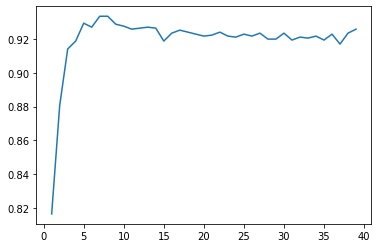

In [6]:
depths = range(1,40)
scores = []
for depth in depths:
  clf = DecisionTreeClassifier(max_depth = depth)
  cross_scores = cross_val_score(clf, Xtrain, Ytrain)
  #Aggregating the scores
  mean_score = np.mean(cross_scores)
  scores.append(mean_score)

plt.plot(depths, scores)

In [7]:
clf = LogisticRegression(max_iter = 500)
cross_scores = cross_val_score(clf, Xtrain, Ytrain)
#Aggregating the scores
mean_score = np.mean(cross_scores)
print(mean_score)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.8835294117647059


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
clf = LinearSVC(max_iter = 500)
cross_scores = cross_val_score(clf, Xtrain, Ytrain)
#Aggregating the scores
mean_score = np.mean(cross_scores)
print(mean_score)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8494117647058823


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Step 4

In [47]:
from sklearn.metrics import accuracy_score
  
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9061032863849765


Decision tree classifier gave this score: 0.9288235294117646

Logistic regression gave this score: 0.8835294117647059

LinearSVC gave this score: 0.8494117647058823

We choose decision tree classifier and its cross-validation evaluation on the test set was: 0.9061032863849765

# Task 2


In [9]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

A *branch* will look at one feature, and will select a subtree depending on the value of the feature. That subtree will then be called recursively to compute the prediction.

This implementation assumes that the feature is numerical. Depending on whether the feature is or isn't greater than a threshold, the "high" or "low" subtree will be selected.

In [10]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        

Now, we have the components needed to implement decision tree classifiers and regression models.

Following standard practice in scikit-learn, we inherit from the class [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), which is the base class of all classifiers and regression models.

We write the `DecisionTree` class as an abstract class that contains the functionality common to all types of decision trees. Classification and regression models will be implemented as subclasses. The classification subclass is given below, while the regression subclass will be implemented as a part of the first assignment. Following scikit-learn naming conventions, we'll call the training and prediction methods `fit` and `predict`, respectively.

The functions that the subclasses will need to implement, and which are done differently for classification and regression, are the following:

* `get_default_value`: what output value to use if we decide to return a leaf node. For classification, this will be the most common output value, while for regression it will be the mean.
* `is_homogeneous`: tests whether a set of output values is homogeneous. For classification, this means that all outputs are identical; for regression, we'll probably test whether the variance is smaller than some threshold.
* `best_split`: finds the best splitting point for that feature. For classification, this will be based on one of the classification criteria (information gain, gini impurity, majority sum); for regression, it will be based on variances in the subsets.

In [11]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

This is the subclass that implements decision tree classification. This implementation makes heavy use of the [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) class, which is a standard Python data structure for frequency counting.

In [12]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


Here, we define the various criteria we can use to find the "quality" of a split in terms of how homogeneous the subsets are. See the reading material for the mathematical definitions of these criteria.

In [13]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

Task 2 implementation

In [14]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Read the CSV file.
data = pd.read_csv("CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

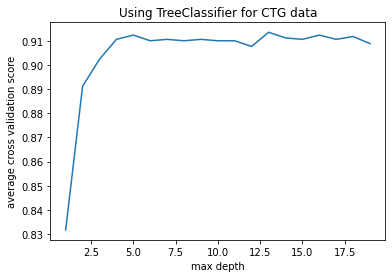

In [15]:
depths = range(1,20)
scores = []
for depth in depths:
  clf = TreeClassifier(max_depth = depth)
  cross_scores = cross_val_score(clf, Xtrain, Ytrain)
  #Aggregating the scores
  mean_score = np.mean(cross_scores)
  scores.append(mean_score)


plt.plot(depths, scores)
plt.xlabel('max depth')
plt.ylabel('average cross validation score')
plt.title('Using TreeClassifier for CTG data')
plt.savefig('Task2_maxdepth_plot.png')

From the plot we can determine that it peaks around max_depth = 13

In [16]:
clf = TreeClassifier(max_depth = 13)
cross_scores = cross_val_score(clf, Xtrain, Ytrain)
#Aggregating the scores
mean_score = np.mean(cross_scores)
print(mean_score)

0.9135294117647058


Draw tree

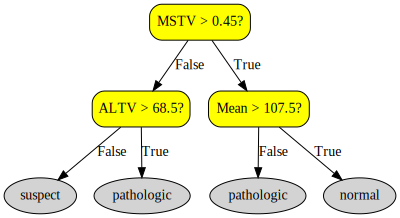

In [17]:
clf = TreeClassifier(max_depth = 2)
clf.fit(Xtrain, Ytrain)
clf.draw_tree()

# Task 3

In [18]:
# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [19]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
result = cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')
average_score = np.mean(result['test_score'])
print(average_score)

-0.38925247260237567


In [20]:
from sklearn.linear_model import LinearRegression
m2 = LinearRegression()
result = cross_validate(m2, Xtrain, Ytrain, scoring='neg_mean_squared_error')
average_score = np.mean(result['test_score'])
print(average_score)

-0.30139865887671935


In [21]:
from sklearn.tree import DecisionTreeRegressor
m3 = DecisionTreeRegressor()
result = cross_validate(m3, Xtrain, Ytrain, scoring='neg_mean_squared_error')
average_score = np.mean(result['test_score'])
print(average_score)

-0.5279733662710949


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
m4 = GradientBoostingRegressor()
result = cross_validate(m4, Xtrain, Ytrain, scoring='neg_mean_squared_error')
average_score = np.mean(result['test_score'])
print(average_score)

-0.26453504702121605


In [23]:
from sklearn.neural_network import MLPRegressor
m5 = MLPRegressor()
result = cross_validate(m5, Xtrain, Ytrain, scoring='neg_mean_squared_error')
average_score = np.mean(result['test_score'])
print(average_score)

-77.16030063118694


List of regression models used:
  * LinearRegression
  * DecisiontreeRegressor
  * GradientBoostingRegressor
  * MLPRegressor

The best regression model was GradientBoostingRegressor and its average negative MSE was: -0.265

# Task 4

Step 1: Implementing the regression model

In [27]:
class TreeRegressor(DecisionTree, RegressorMixin): 
  
  def __init__(self, max_depth=10):
      super().__init__(max_depth)
      
  def fit(self, X, Y):
      super().fit(X, Y)
      self.classes_ = sorted(set(Y))
  
  def get_default_value(self, Y): 
    return np.mean(Y)
  
  def is_homogeneous(self, Y):
    return np.var(Y) < 0.01
  
  def best_split(self, X, Y, feature):
    # Create a list of input-output pairs, where we have sorted
    # in ascending order by the input feature we're considering.
    sorted_indices = np.argsort(X[:, feature])        
    X_sorted = list(X[sorted_indices, feature])
    Y_sorted = list(Y[sorted_indices])

    n = len(Y)

    # Keep track of the best result we've seen so far.
    max_score = -np.inf
    max_i = None

    # Go through all the positions (excluding the last position).
    for i in range(0, n-1):

        # Input and output at the current position.
        left = Y_sorted[0:i]
        right = Y_sorted[i:n]
        

        # If the input is equal to the input at the next position, we will
        # not consider a split here.
        #x_next = XY[i+1][0]
        x_i = X_sorted[i]
        x_next = X_sorted[i+1]
        if x_i == x_next:
            continue

        # Compute the homogeneity criterion for a split at this position.
        score = self.var((Y_sorted)) - (len(left)/n)*self.var((left)) - (len(right)/n)*self.var((right))

        # If this is the best split, remember it.
        if score > max_score:
            max_score = score
            max_i = i

    # If we didn't find any split (meaning that all inputs are identical), return
    # a dummy value.
    if max_i is None:
        return -np.inf, None, None

    # Otherwise, return the best split we found and its score.
    split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
    return max_score, feature, split_point

  def var(self, data):
      if len(data) == 0:
        return 0
      data_pow = [number ** 2 for number in data]
      vary = (1/len(data))*sum(data_pow) - (1/(len(data)**2))*(sum(data_pow)**2)
      return vary



Step 2: Sanity check

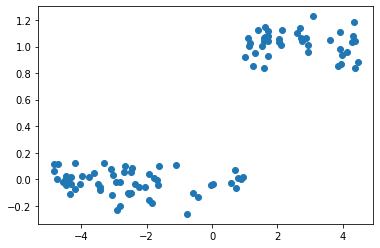

In [50]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X,Y = make_some_data(100)
plt.scatter(X,Y)


By looking at the plot, and the data generator function,  we can see that an optimal threshold would be around 1.0

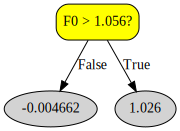

In [55]:
reg = TreeRegressor(max_depth = 1) #By looking at the scatter plot we see that there is only need for one division
reg.fit(X,Y)
reg.draw_tree()

The regression tree chooses a sane threshold. When we try larget max_depths it stops dividing the data after 2 splits. This could be because we have choosen a variance so that it can be hard to find "clusters" such that the variance within a "cluster" is high enough for it to be splitted. 



Step 3: Predicting apartment prices using decision tree regression

In [31]:
depths = range(1,15)
scores = []
for depth in depths:
  reg = TreeRegressor(max_depth = depth) 
  score = np.mean(cross_validate(reg, Xtrain, Ytrain, cv = 3, scoring = 'neg_mean_squared_error')['test_score'])
  scores.append(score)

print(scores)


[-0.32804116219179935, -0.30306025266644687, -0.2939474300389446, -0.28655636435900916, -0.28391941383107816, -0.2820459553882017, -0.2823077733526222, -0.2858972609806487, -0.2938318333304815, -0.3029638627989229, -0.3140998174679055, -0.33634461037334473, -0.3508065242609401, -0.3722294783338704]


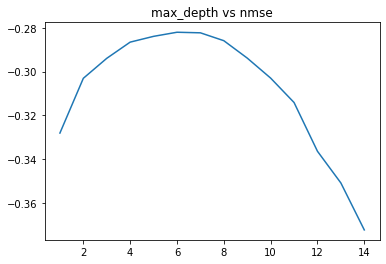

In [34]:
plt.title("max_depth vs nmse")
plt.plot(depths,scores)

In [ ]:
reg = TreeRegressor(max_depth = 7)
reg.fit(Xtrain,Ytrain)

reg.draw_tree()

We see that max_depth = 7 gives the best negative mean squared error 

In [40]:
from sklearn.metrics import mean_squared_error

Ypred= reg.predict(Xtest)

MSE = mean_squared_error(Ytest, Ypred)
print(MSE)

0.28628810499720164


In comparisons with task 3, this MSE score of 0.282 is good. When we tried the built-in regression moduls from sklearn, they did not get a better MSE score. 

Step 4. Underfitting and overfitting

We have already plotted the evaluation score on the training set in step 3. So now we'll do it for the test set.

In [43]:
depths = range(1,15)
scores = []
for depth in depths:
  reg = TreeRegressor(max_depth = depth) 
  reg.fit(Xtrain, Ytrain)
  Ypred = reg.predict(Xtest)
  NMSE = -mean_squared_error(Ytest, Ypred)
  scores.append(NMSE)

print(scores)

[-0.33945576109939973, -0.3110216349305739, -0.29973515619605723, -0.2913556094867294, -0.2890313884681345, -0.28273104388176085, -0.28628810499720164, -0.2839497006698575, -0.28512372444791007, -0.2925428986412744, -0.30501012462164956, -0.3270488216669223, -0.34262901332230616, -0.35796148308027015]


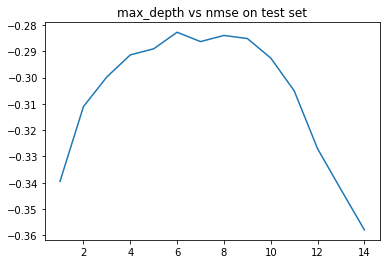

In [44]:
plt.title("max_depth vs nmse on test set")
plt.plot(depths,scores)

For the curves on the training set, it looks smoother. Especially between 4 and 9. For the test set it does not appear that smooth. In the test set it looks like the best maximum depth would be 6, when it was 7 for the training set. But overall they are similar. This means that the model shows a good generalisation for prediciting new data. And that is does not overfit or underfit.